In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

__Решение__

Найдем коэффиценты

Воспользуемся формулой:

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \:
b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

In [3]:
b1 = ((x * y).mean() - (y.mean() * x.mean())) / ((x ** 2).mean() - x.mean() ** 2)
b0 = y.mean() - (b1 * x.mean())
b1, b0

(2.620538882402765, 444.1773573243596)

Теперь через метод наименьших квадратов:

$$b = (X^\top X)^{-1} X^\top y.$$

In [4]:
x_ = x.reshape(-1, 1)
ones = np.ones(shape=x_.shape)

x_ = np.hstack((ones, x_))
x_.shape

(10, 2)

In [5]:
x_

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [6]:
y_ = y.reshape(-1, 1)
XTX = x_.T.dot(x_)
XTX_i = np.linalg.inv(XTX)
b = XTX_i.dot(x_.T).dot(y_)
print(b)

[[444.17735732]
 [  2.62053888]]


Построим график:

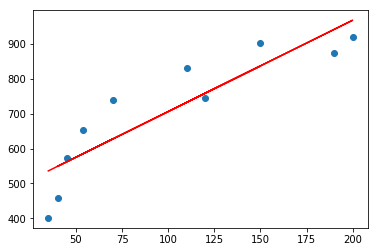

In [7]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red')

Коэффициент детерминации:

In [8]:
z = b0 + b1 * x
R2 = z.var() / y.var()
R2

0.7876386635293678

Средняя ошибка аппроксимации:

In [9]:
def mean_error(y_r: np.ndarray, y_p: np.ndarray) -> float:
    return np.abs((y_r - y_p) / y_r).mean()

In [10]:
mean_error(y, z)

0.11469251843561709

Оценим построенное уравнение регрессии с помощью F-критерия Фишера:

$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k}$$

In [11]:
n = x.shape[0]
k = 1

k1 = k
k2 = n - k - 1
T = (R2 / (1 - R2)) * (k2 / k1)
T

29.67164085966437

Допустим __a__ = 0.05

In [12]:
alpha = 0.05 
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Так как $T > F_{crit}$ уравнение можно считать статистически значимым.

Построим __доверительные интервалы с помощью t-статистики Стьюдента__:

In [13]:
def error_slope(x: np.ndarray, y: np.ndarray, z: np.ndarray) -> float:
    n = x.shape[0]
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    return np.sqrt(upper / lower)

def error_inter(x: np.ndarray, y: np.ndarray, z: np.ndarray) -> float:
    return error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [14]:
s_slope = error_slope(x, y, z)
s_slope

0.48108279568516005

In [15]:
T = b1 / s_slope
T

5.447168150485579

Для статистики Стьюдента возьмем уровень занчимости __а__ = 0.05 и n = 8

In [16]:
t = stats.t.ppf(1 - alpha / 2, 8)
t

2.3060041350333704

In [17]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

In [18]:
s_inter = error_inter(x, y, z)
T = b0 / s_inter
T

7.866210524668863

In [19]:
(b0 - t * s_inter, b0 + t * s_inter)

(313.9653804816363, 574.3893341670829)


__Задача 2__

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [20]:
anscombe_ds = pd.read_csv('anscombe.csv', index_col = 'id')
anscombe_ds

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


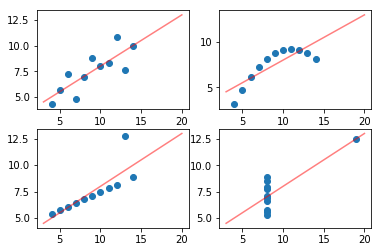

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ox = np.linspace(3, 20, 10 ** 4)

for i, ax in enumerate(axes.flatten()):
    i += 1
    
    x_key = f'x{i}'
    y_key = f'y{i}'
    
    x = anscombe_ds[x_key]
    y = anscombe_ds[y_key]
    
    b1 = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - x.mean() ** 2)
    b0 = y.mean() - b1 * x.mean()
    
    oy = b0 + b1 * ox
    ax.scatter(x, y)
    ax.plot(ox, oy, color='red', alpha=0.5)